<a href="https://colab.research.google.com/github/snesne28/DevOps/blob/master/resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Datasets'

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import os


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

batch_size = 32

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,num_workers=4)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(pretrained=True)
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 208MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
!cp -r "/content/drive/MyDrive/Datasets" "/content/Datasets"
data_dir = '/content/Datasets'

In [ ]:
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

    checkpoint_path = f"/content/drive/MyDrive/resnet50_checkpoint_epoch{epoch+1}.pth"
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss / len(train_loader),
    }, checkpoint_path)

    print(f"Checkpoint saved at epoch {epoch+1}")


Epoch 1, Loss: 0.2159
Checkpoint saved at epoch 1
Epoch 2, Loss: 0.0725
Checkpoint saved at epoch 2
Epoch 3, Loss: 0.0511
Checkpoint saved at epoch 3
Epoch 4, Loss: 0.0456
Checkpoint saved at epoch 4
Epoch 5, Loss: 0.0721
Checkpoint saved at epoch 5
Epoch 6, Loss: 0.0528
Checkpoint saved at epoch 6
Epoch 7, Loss: 0.0150
Checkpoint saved at epoch 7
Epoch 8, Loss: 0.0037
Checkpoint saved at epoch 8
Epoch 9, Loss: 0.0020
Checkpoint saved at epoch 9
Epoch 10, Loss: 0.0035
Checkpoint saved at epoch 10
Epoch 11, Loss: 0.0215
Checkpoint saved at epoch 11
Epoch 12, Loss: 0.0154
Checkpoint saved at epoch 12
Epoch 13, Loss: 0.0414
Checkpoint saved at epoch 13
Epoch 14, Loss: 0.0611
Checkpoint saved at epoch 14
Epoch 15, Loss: 0.0186
Checkpoint saved at epoch 15
Epoch 16, Loss: 0.0366
Checkpoint saved at epoch 16
Epoch 17, Loss: 0.0231
Checkpoint saved at epoch 17
Epoch 18, Loss: 0.0403
Checkpoint saved at epoch 18
Epoch 19, Loss: 0.0551
Checkpoint saved at epoch 19
Epoch 20, Loss: 0.0403
Checkpo

In [ ]:
model_path = '/content/drive/MyDrive/resnet50_model.pth'
torch.save(model.state_dict(), model_path)


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')


Validation Accuracy: 94.34%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# CONFIG
checkpoint_dir = "/content/drive/MyDrive"  # folder containing checkpoints
val_data_path = "/content/Datasets/val"  # your validation set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 32

# Prepare validation data
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_dataset = datasets.ImageFolder(val_data_path, transform=val_transforms)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
num_classes = len(val_dataset.classes)

# Find all checkpoint files
checkpoint_files = []
for file in os.listdir(checkpoint_dir):
    if file.endswith(".pth") and "checkpoint" in file:
        match = re.search(r'epoch(\d+)', file)
        epoch = int(match.group(1)) if match else -1
        checkpoint_files.append((file, epoch))

checkpoint_files.sort(key=lambda x: x[1])

# Evaluate each checkpoint
def evaluate_model(checkpoint_path):
    model = models.resnet50(pretrained=False)
    model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
    checkpoint = torch.load(os.path.join(checkpoint_dir, checkpoint_path), map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    model.eval()

    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy

print(" Evaluating Checkpoints:\n")
results = []
for file, epoch in checkpoint_files:
    try:
        acc = evaluate_model(file)
        results.append((file, acc))
        print(f"{file} → {acc:.2f}%")
    except Exception as e:
        print(f"Error evaluating {file}: {e}")

# Show best checkpoint
if results:
    best_file, best_acc = max(results, key=lambda x: x[1])
    print(f"\nBest checkpoint: {best_file} with accuracy {best_acc:.2f}%")
else:
    print("\n No valid checkpoints evaluated.")


🔎 Evaluating Checkpoints:



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ resnet50_checkpoint_epoch1.pth → 94.76%
✅ resnet50_checkpoint_epoch2.pth → 94.87%
✅ resnet50_checkpoint_epoch3.pth → 93.80%
✅ resnet50_checkpoint_epoch4.pth → 93.80%
✅ resnet50_checkpoint_epoch5.pth → 92.31%
✅ resnet50_checkpoint_epoch6.pth → 93.27%
✅ resnet50_checkpoint_epoch7.pth → 94.34%
✅ resnet50_checkpoint_epoch8.pth → 94.44%
✅ resnet50_checkpoint_epoch9.pth → 95.30%
✅ resnet50_checkpoint_epoch10.pth → 94.55%
✅ resnet50_checkpoint_epoch11.pth → 94.87%
✅ resnet50_checkpoint_epoch12.pth → 92.63%
✅ resnet50_checkpoint_epoch13.pth → 93.91%
✅ resnet50_checkpoint_epoch14.pth → 94.02%
✅ resnet50_checkpoint_epoch15.pth → 94.12%
✅ resnet50_checkpoint_epoch16.pth → 94.87%
✅ resnet50_checkpoint_epoch17.pth → 94.76%
✅ resnet50_checkpoint_epoch18.pth → 95.19%
✅ resnet50_checkpoint_epoch19.pth → 94.23%
✅ resnet50_checkpoint_epoch20.pth → 94.02%
✅ resnet50_checkpoint_epoch21.pth → 93.59%
✅ resnet50_checkpoint_epoch22.pth → 93.91%
✅ resnet50_checkpoint_epoch23.pth → 94.98%
✅ resnet50_checkpoin

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Final Performance Metrics:
Accuracy  : 0.9530
Precision : 0.9530
Recall    : 0.9530
F1 Score  : 0.9528

📋 Classification Report for Resnet50:
              precision    recall  f1-score   support

     cheetah       0.96      0.92      0.94       304
     leopard       0.92      0.94      0.93       280
       tiger       0.98      1.00      0.99       352

    accuracy                           0.95       936
   macro avg       0.95      0.95      0.95       936
weighted avg       0.95      0.95      0.95       936



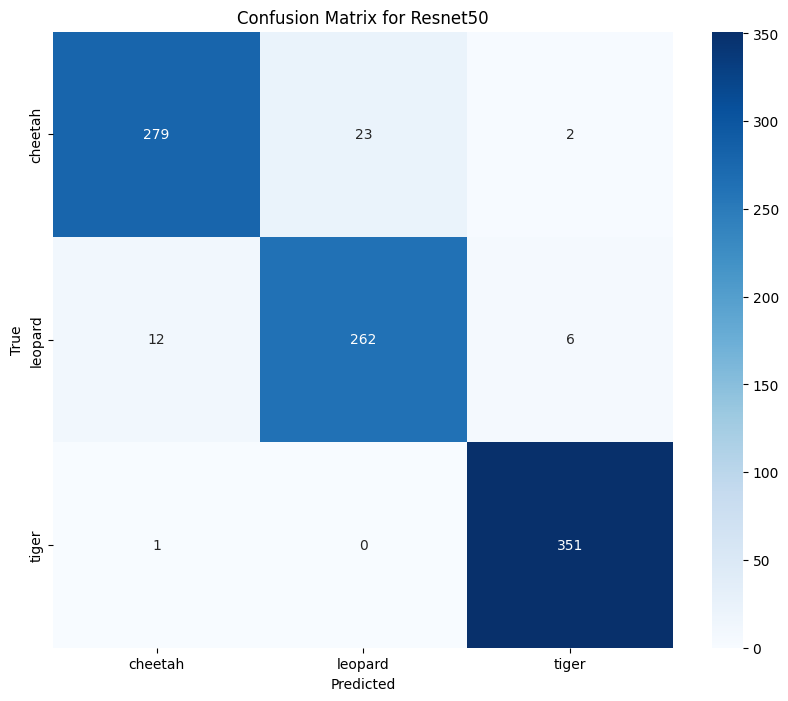

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Paths
checkpoint_path = '/content/drive/MyDrive/resnet50_checkpoint_epoch9.pth'
val_data_path = '/content/Datasets/val'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_dataset = datasets.ImageFolder(val_data_path, transform=val_transforms)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model = models.resnet50(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, len(val_dataset.classes))
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

#Evaluation
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("Final Performance Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\n📋 Classification Report for Resnet50:")
print(classification_report(y_true, y_pred, target_names=val_dataset.classes, zero_division=0))

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_dataset.classes, yticklabels=val_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Resnet50')
plt.show()
